
Hi! Introducing me Farchan Akbar, I am a graduate of informatics engineering in 2022 and 22 years old. <br>
I really want to work in the data scientist field. I hope this portfolio can be taken into consideration in the recruitment process, thank you <br>

Sorry if my English is bad :') I hope you like it! <b/>

[Link to a dataset diabetes](https://www.kaggle.com/datasets/nehadammannagari/email-spam-text-dataset)

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
# load dataset
data = pd.read_csv('emails.csv')

In [3]:
# 5 first rows 
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
# 5 last rows 
data.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
# check missing value
data.isnull().sum()

text    0
spam    0
dtype: int64

In [6]:
# check double space in text
data['text'].str.isspace().sum()

0

In [7]:
# check the number of data labels
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

<AxesSubplot:xlabel='spam', ylabel='count'>

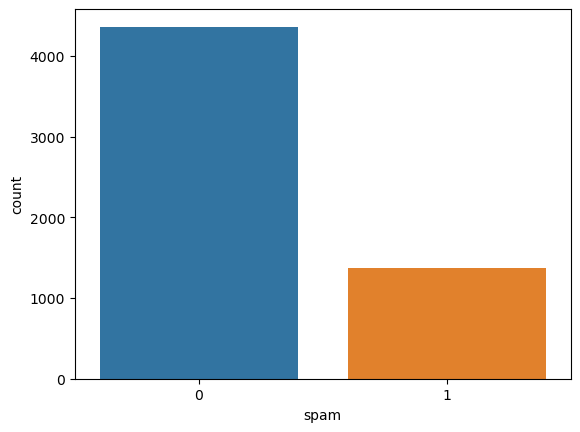

In [8]:
# unbalanced datasets
sns.countplot(data=data, x='spam')

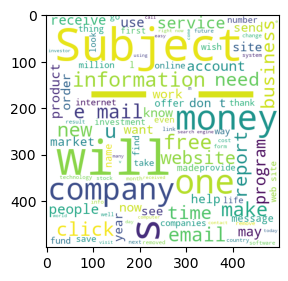

In [9]:
# check the word that often appears on the label 1
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(data[data['spam'] == 1]['text'].str.cat(sep=" "))
plt.figure(figsize=(3,6))
plt.imshow(spam_wc)

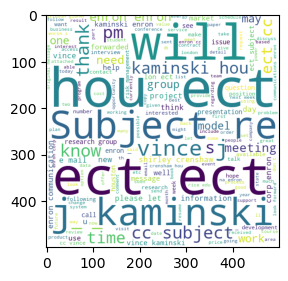

In [10]:
# # check the word that often appears on the label 0
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(data[data['spam'] == 0]['text'].str.cat(sep=" "))
plt.figure(figsize=(3,6))
plt.imshow(spam_wc)

In [11]:
# check text index 0
data['text'].iloc[0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [12]:
data['text'].iloc[5723]

'Subject: re : research and development charges to gpg  here it is !  - - - - - - - - - - - - - - - - - - - - - - forwarded by shirley crenshaw / hou / ect on 08 / 14 / 2000  07 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  vince j kaminski  08 / 10 / 2000 02 : 25 pm  to : vera apodaca / et & s / enron @ enron  cc : vince j kaminski / hou / ect @ ect , shirley crenshaw / hou / ect @ ect , pinnamaneni  krishnarao / hou / ect @ ect  subject : re : research and development charges to gpg  vera ,  we shall talk to the accounting group about the correction .  vince  08 / 09 / 2000 03 : 26 pm  vera apodaca @ enron  vera apodaca @ enron  vera apodaca @ enron  08 / 09 / 2000 03 : 26 pm  08 / 09 / 2000 03 : 26 pm  to : pinnamaneni krishnarao / hou / ect @ ect  cc : vince j kaminski / hou / ect @ ect  subject : research and development charges to gpg  per mail dated june 15 from kim watson , there was supposed to have occurred  a true - up of $ 274 . 7 in july for the fist six m

In [13]:
# split data feature and target
X = data['text']
y = data['spam']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# use 20% for data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# use parameter stop_word
tfidf = TfidfVectorizer(stop_words='english')

In [18]:
# fit and transform data training and testing
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [19]:
# use naive bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [20]:
# use support vector machine model
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [21]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [22]:
# create function for show classification and confusion matrix
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

MODEL NAIVE BAYES
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       875
           1       1.00      0.62      0.77       271

    accuracy                           0.91      1146
   macro avg       0.95      0.81      0.86      1146
weighted avg       0.92      0.91      0.90      1146



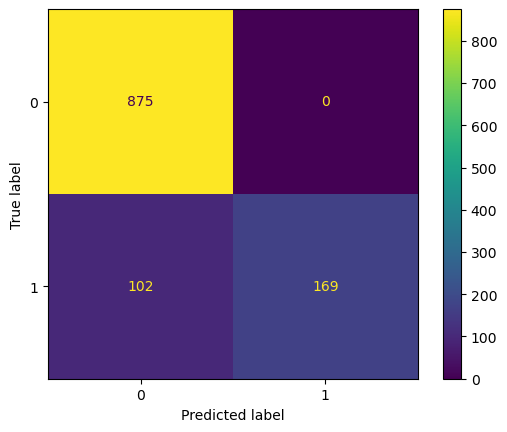

In [23]:
# we have accuracy 91% for naive bayes
print('MODEL NAIVE BAYES')
report(nb)

MODEL SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       875
           1       1.00      1.00      1.00       271

    accuracy                           1.00      1146
   macro avg       1.00      1.00      1.00      1146
weighted avg       1.00      1.00      1.00      1146



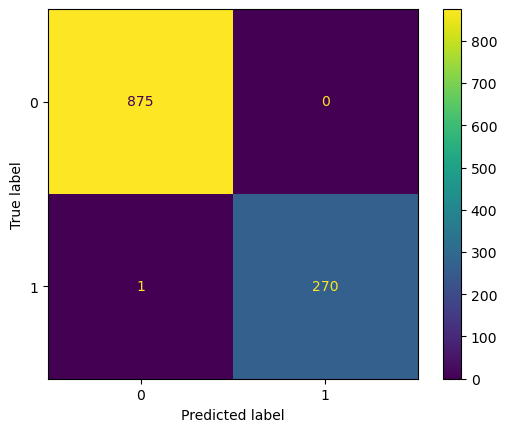

In [24]:
# we have 100% accuracy for support vector machine
print('MODEL SVM')
report(svc)

amazing! we get very high accuracy with the support vectore machine model, good job guys

I hope you like it! and 
sorry if my English is bad :(